In [1]:
from IPython.core.display import display, HTML
from IPython.display import display, Markdown
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pyspedas
import numpy as np
import matplotlib.pyplot as plt
params = {'tex.usetex': True}
import matplotlib.dates as md


from pytplot import get_data,store_data, timebar,tplot, tplot_names
from pyspedas import time_string, time_double, mms
from pyspedas.mms import curlometer 
from matplotlib.colors import LogNorm
from datetime import datetime 

#from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from pandas import Series, DataFrame

%matplotlib inline
%matplotlib notebook

* https://github.com/spedas/pyspedas

## Configurações  

In [8]:
start_time = '2015-10-07/11:30:00'
end_time   = '2015-10-07/12:00:00'

ttext = start_time.split('/')

probe = ['1','2','3','4']
datatype=['dis-moms','des-moms']
t_clip = 'True'

data_rate_fgm = 'srvy'
data_rate_fpi = 'fast'

cgeo = 'gse'

## Carregamentos 

In [9]:
pyspedas.mms.mec(trange=[start_time,end_time] , probe=probe, time_clip=t_clip)
pyspedas.mms.fpi(trange=[start_time, end_time], probe=probe, datatype=datatype, data_rate= data_rate_fpi, time_clip=t_clip)
pyspedas.mms.fgm(trange=[start_time,end_time] , probe=probe, data_rate= data_rate_fgm ,time_clip=t_clip)

pyspedas.mms.edp(trange=[start_time,end_time] , probe=probe)

03-Apr-23 10:00:12: Loading pydata\mms1\mec\srvy\l2\epht89q\2015\10\mms1_mec_srvy_l2_epht89q_20151007_v2.0.0.cdf
03-Apr-23 10:00:13: Loading pydata\mms2\mec\srvy\l2\epht89q\2015\10\mms2_mec_srvy_l2_epht89q_20151007_v2.0.0.cdf
03-Apr-23 10:00:13: Loading pydata\mms3\mec\srvy\l2\epht89q\2015\10\mms3_mec_srvy_l2_epht89q_20151007_v2.0.0.cdf
03-Apr-23 10:00:13: Loading pydata\mms4\mec\srvy\l2\epht89q\2015\10\mms4_mec_srvy_l2_epht89q_20151007_v2.0.0.cdf


Time clip was applied to: mms1_mec_dipole_tilt
Time clip was applied to: mms1_mec_gmst
Time clip was applied to: mms1_mec_mlat
Time clip was applied to: mms1_mec_mlt
Time clip was applied to: mms1_mec_l_dipole
Time clip was applied to: mms1_mec_quat_eci_to_bcs
Time clip was applied to: mms1_mec_quat_eci_to_dbcs
Time clip was applied to: mms1_mec_quat_eci_to_dmpa
Time clip was applied to: mms1_mec_quat_eci_to_smpa
Time clip was applied to: mms1_mec_quat_eci_to_dsl
Time clip was applied to: mms1_mec_quat_eci_to_ssl
Time clip was applied to: mms1_mec_L_vec
Time clip was applied to: mms1_mec_Z_vec
Time clip was applied to: mms1_mec_P_vec
Time clip was applied to: mms1_mec_L_phase
Time clip was applied to: mms1_mec_Z_phase
Time clip was applied to: mms1_mec_P_phase
Time clip was applied to: mms1_mec_kp
Time clip was applied to: mms1_mec_dst
Time clip was applied to: mms1_mec_earth_eclipse_flag
Time clip was applied to: mms1_mec_moon_eclipse_flag
Time clip was applied to: mms1_mec_r_eci
Time

03-Apr-23 10:00:18: Loading pydata\mms1\fpi\fast\l2\dis-moms\2015\10\mms1_fpi_fast_l2_dis-moms_20151007100000_v3.3.0.cdf
03-Apr-23 10:00:18: Loading pydata\mms1\fpi\fast\l2\des-moms\2015\10\mms1_fpi_fast_l2_des-moms_20151007100000_v3.3.0.cdf
03-Apr-23 10:00:18: Loading pydata\mms2\fpi\fast\l2\dis-moms\2015\10\mms2_fpi_fast_l2_dis-moms_20151007100000_v3.3.0.cdf
03-Apr-23 10:00:18: Loading pydata\mms2\fpi\fast\l2\des-moms\2015\10\mms2_fpi_fast_l2_des-moms_20151007100000_v3.3.0.cdf
03-Apr-23 10:00:19: Loading pydata\mms3\fpi\fast\l2\dis-moms\2015\10\mms3_fpi_fast_l2_dis-moms_20151007100000_v3.3.0.cdf
03-Apr-23 10:00:19: Loading pydata\mms3\fpi\fast\l2\des-moms\2015\10\mms3_fpi_fast_l2_des-moms_20151007100000_v3.3.0.cdf
03-Apr-23 10:00:19: Loading pydata\mms4\fpi\fast\l2\dis-moms\2015\10\mms4_fpi_fast_l2_dis-moms_20151007100000_v3.3.0.cdf
03-Apr-23 10:00:19: Loading pydata\mms4\fpi\fast\l2\des-moms\2015\10\mms4_fpi_fast_l2_des-moms_20151007100000_v3.3.0.cdf


Time clip was applied to: mms1_des_errorflags_fast
Time clip was applied to: mms1_des_startdelphi_count_fast
Time clip was applied to: mms1_des_startdelphi_angle_fast
Time clip was applied to: mms1_des_pitchangdist_lowen_fast
Time clip was applied to: mms1_des_pitchangdist_miden_fast
Time clip was applied to: mms1_des_pitchangdist_highen_fast
Time clip was applied to: mms1_des_energyspectr_px_fast
Time clip was applied to: mms1_des_energyspectr_mx_fast
Time clip was applied to: mms1_des_energyspectr_py_fast
Time clip was applied to: mms1_des_energyspectr_my_fast
Time clip was applied to: mms1_des_energyspectr_pz_fast
Time clip was applied to: mms1_des_energyspectr_mz_fast
Time clip was applied to: mms1_des_energyspectr_par_fast
Time clip was applied to: mms1_des_energyspectr_anti_fast
Time clip was applied to: mms1_des_energyspectr_perp_fast
Time clip was applied to: mms1_des_energyspectr_omni_fast
Time clip was applied to: mms1_des_numberdensity_fast
Time clip was applied to: mms1_des

Time clip was applied to: mms3_dis_startdelphi_count_fast
Time clip was applied to: mms3_dis_startdelphi_angle_fast
Time clip was applied to: mms3_dis_energyspectr_px_fast
Time clip was applied to: mms3_dis_energyspectr_mx_fast
Time clip was applied to: mms3_dis_energyspectr_py_fast
Time clip was applied to: mms3_dis_energyspectr_my_fast
Time clip was applied to: mms3_dis_energyspectr_pz_fast
Time clip was applied to: mms3_dis_energyspectr_mz_fast
Time clip was applied to: mms3_dis_energyspectr_omni_fast
Time clip was applied to: mms3_dis_spectr_bg_fast
Time clip was applied to: mms3_dis_numberdensity_bg_fast
Time clip was applied to: mms3_dis_numberdensity_fast
Time clip was applied to: mms3_dis_numberdensity_err_fast
Time clip was applied to: mms3_dis_densityextrapolation_low_fast
Time clip was applied to: mms3_dis_densityextrapolation_high_fast
Time clip was applied to: mms3_dis_bulkv_dbcs_fast
Time clip was applied to: mms3_dis_bulkv_spintone_dbcs_fast
Time clip was applied to: mms

03-Apr-23 10:00:24: Loading pydata\mms1\fgm\srvy\l2\2015\10\mms1_fgm_srvy_l2_20151007_v4.18.0.cdf
03-Apr-23 10:00:24: Loading pydata\mms2\fgm\srvy\l2\2015\10\mms2_fgm_srvy_l2_20151007_v4.18.0.cdf
03-Apr-23 10:00:24: Loading pydata\mms3\fgm\srvy\l2\2015\10\mms3_fgm_srvy_l2_20151007_v4.18.0.cdf
03-Apr-23 10:00:25: Loading pydata\mms4\fgm\srvy\l2\2015\10\mms4_fgm_srvy_l2_20151007_v4.18.0.cdf


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms2_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms3_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
The lengths of x and y do not match!
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms4_fgm_rdeltahalf_srvy_l2 is currently not in pytplo

03-Apr-23 10:01:02: Loading pydata\mms1\edp\fast\l2\dce\2015\10\mms1_edp_fast_l2_dce_20151007_v2.1.0.cdf
03-Apr-23 10:01:03: Loading pydata\mms2\edp\fast\l2\dce\2015\10\mms2_edp_fast_l2_dce_20151007_v2.1.0.cdf
03-Apr-23 10:01:03: Loading pydata\mms3\edp\fast\l2\dce\2015\10\mms3_edp_fast_l2_dce_20151007_v2.1.0.cdf
03-Apr-23 10:01:03: Loading pydata\mms4\edp\fast\l2\dce\2015\10\mms4_edp_fast_l2_dce_20151007_v2.1.0.cdf


Time clip was applied to: mms1_edp_dce_gse_fast_l2
Time clip was applied to: mms1_edp_dce_dsl_fast_l2
Time clip was applied to: mms1_edp_dce_par_epar_fast_l2
Time clip was applied to: mms2_edp_dce_gse_fast_l2
Time clip was applied to: mms2_edp_dce_dsl_fast_l2
Time clip was applied to: mms2_edp_dce_par_epar_fast_l2
Time clip was applied to: mms3_edp_dce_gse_fast_l2
Time clip was applied to: mms3_edp_dce_dsl_fast_l2
Time clip was applied to: mms3_edp_dce_par_epar_fast_l2
Time clip was applied to: mms4_edp_dce_gse_fast_l2
Time clip was applied to: mms4_edp_dce_dsl_fast_l2
Time clip was applied to: mms4_edp_dce_par_epar_fast_l2
Loaded variables:
mms1_edp_dce_gse_fast_l2
mms1_edp_dce_dsl_fast_l2
mms1_edp_dce_par_epar_fast_l2
mms2_edp_dce_gse_fast_l2
mms2_edp_dce_dsl_fast_l2
mms2_edp_dce_par_epar_fast_l2
mms3_edp_dce_gse_fast_l2
mms3_edp_dce_dsl_fast_l2
mms3_edp_dce_par_epar_fast_l2
mms4_edp_dce_gse_fast_l2
mms4_edp_dce_dsl_fast_l2
mms4_edp_dce_par_epar_fast_l2


['mms1_edp_dce_gse_fast_l2',
 'mms1_edp_dce_dsl_fast_l2',
 'mms1_edp_dce_par_epar_fast_l2',
 'mms2_edp_dce_gse_fast_l2',
 'mms2_edp_dce_dsl_fast_l2',
 'mms2_edp_dce_par_epar_fast_l2',
 'mms3_edp_dce_gse_fast_l2',
 'mms3_edp_dce_dsl_fast_l2',
 'mms3_edp_dce_par_epar_fast_l2',
 'mms4_edp_dce_gse_fast_l2',
 'mms4_edp_dce_dsl_fast_l2',
 'mms4_edp_dce_par_epar_fast_l2']

## Curlometer calculations

https://github.com/spedas/mms-examples/blob/master/basic/Curlometer%20Technique.ipynb

https://github.com/spedas/mms-examples/blob/master/advanced/FPI_curlometer.ipynb

In [97]:
positions = ['mms1_mec_r_gse', 'mms2_mec_r_gse', 'mms3_mec_r_gse', 'mms4_mec_r_gse']
fields = ['mms1_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2', 'mms2_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2', 'mms3_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2', 'mms4_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2']

curlometer_vars = curlometer(fields=fields, positions=positions)

tinterpol (linear) was applied to: mms2_fgm_b_gse_srvy_l2_i
tinterpol (linear) was applied to: mms3_fgm_b_gse_srvy_l2_i
tinterpol (linear) was applied to: mms4_fgm_b_gse_srvy_l2_i
tinterpol (linear) was applied to: mms1_mec_r_gse_i
tinterpol (linear) was applied to: mms2_mec_r_gse_i
tinterpol (linear) was applied to: mms3_mec_r_gse_i
tinterpol (linear) was applied to: mms4_mec_r_gse_i


In [148]:
curlometer_vars

['baryb', 'curlB', 'divB', 'jtotal', 'jpar', 'jperp', 'alpha', 'alphaparallel']

In [149]:
t_j, j = get_data('jtotal')

In [150]:
j

array([[            nan,             nan,             nan],
       [-1.21003570e-09, -1.22586489e-09, -1.04304916e-09],
       [-4.62755021e-10, -8.06211928e-10,  4.50134441e-11],
       ...,
       [-8.60238954e-08,  1.23206523e-08, -1.64448112e-07],
       [-8.73556231e-08,  7.20732438e-08, -2.00430267e-07],
       [            nan,             nan,             nan]])

## Extração dos dados 

In [151]:
# Variáveis fgm 

## Campo magnético    
t1_gse, b1 = get_data('mms1_fgm_b_'+cgeo+'_'+data_rate_fgm+'_l2')

# Variáveis do edi 
t1_edp, e1 = get_data('mms1_edp_dce_'+cgeo+'_'+data_rate_fpi+'_l2')

# variáveis fpi 

## densidade numérica
t1_fpi, d1 = get_data('mms1_dis_numberdensity_'+data_rate_fpi)

## Velocidade
t1_v, v1   = get_data('mms1_dis_bulkv_'+cgeo+'_'+data_rate_fpi)

## Espectro de energia
t1_i , data1_i, energy1_i= get_data('mms1_dis_energyspectr_omni_'+data_rate_fpi)

## Variaveis mec
t1_p, pos1 = get_data('mms1_mec_r_gse')

pos1_r = pos1/6371.2

######################################################################################
#Algumas construções 

v1_t = np.zeros(len(v1));
j_t  = np.zeros(len(j)); 
e_t  = np.zeros(len(e1));
p_t  = np.zeros(len(pos1_r))

# Construção do v_total
for i in range(len(v1)):
    v1_t[i] = np.linalg.norm(v1[i,:]) 

#Construção do J_total
for i in range(len(j)):
    j_t[i] = np.linalg.norm(j[i,:]) 
    
#Construção do e_total
for i in range(len(e1)):
    e_t[i] = np.linalg.norm(e1[i,:])

# Construção da posição

for i in range(len(pos1_r)):
    p_t[i] = np.linalg.norm(pos1_r[i,:])
    
## Temperatura dos íons e dos elétrons para MMS1
T_e1pr, T_epr = get_data('mms1_des_tempperp_'+data_rate_fpi)
T_e1pl, T_epl = get_data('mms1_des_temppara_'+data_rate_fpi)

T_i1pr, T_ipr = get_data('mms1_dis_tempperp_'+data_rate_fpi)
T_i1pl, T_ipl = get_data('mms1_dis_temppara_'+data_rate_fpi)
    
dis_T = (T_ipl + 2*T_ipr)/3.0 
des_T = (T_epl + 2*T_epr)/3.0 

In [152]:
#Escrever os dados de posição da sonda com 3 casas decimais
pos1_r = np.round(pos1_r,3)
pos1_r

array([[ 8.091,  8.694, -0.489],
       [ 8.088,  8.698, -0.49 ],
       [ 8.086,  8.702, -0.49 ],
       [ 8.083,  8.706, -0.491],
       [ 8.081,  8.71 , -0.491],
       [ 8.078,  8.714, -0.492],
       [ 8.076,  8.718, -0.493],
       [ 8.073,  8.722, -0.493],
       [ 8.071,  8.726, -0.494],
       [ 8.068,  8.73 , -0.494],
       [ 8.066,  8.734, -0.495],
       [ 8.063,  8.738, -0.495],
       [ 8.061,  8.742, -0.496],
       [ 8.058,  8.746, -0.497],
       [ 8.056,  8.75 , -0.497],
       [ 8.053,  8.754, -0.498],
       [ 8.051,  8.758, -0.498],
       [ 8.048,  8.762, -0.499],
       [ 8.045,  8.766, -0.499],
       [ 8.043,  8.77 , -0.5  ],
       [ 8.04 ,  8.774, -0.501],
       [ 8.038,  8.777, -0.501],
       [ 8.035,  8.781, -0.502],
       [ 8.033,  8.785, -0.502],
       [ 8.03 ,  8.789, -0.503],
       [ 8.027,  8.793, -0.503],
       [ 8.025,  8.797, -0.504],
       [ 8.022,  8.801, -0.505],
       [ 8.019,  8.805, -0.505],
       [ 8.017,  8.809, -0.506],
       [ 8

### Ajuste dos dados de Tempo 

In [153]:
# Ajuste dos valres de tempo para o plot (Não mexer após a primeira iteração)

# Campo magnético
t1 = md.date2num(time_string(t1_gse))

#Campo elétrico 
t1_e = md.date2num(time_string(t1_edp))

#J
t1_j = md.date2num(time_string(t_j))

# Dados de plasma
t1_d = md.date2num(time_string(t1_fpi))
t1_v  = md.date2num(time_string(t1_v))
t1_en = md.date2num(time_string(t1_i)) 

# Dados de posição

t_p1 = md.date2num(time_string(t1_p))

### Etapa de finalização 

In [154]:
# Intervalo Total do plot
IT1 = '11:44:00'
IT2 = '11:46:00'

# Primeiro par de barras verticais (inferior e superior)
IB11 = '11:44:22'
IB12 = '11:44:32'

# Segundo par de barras verticais (inferior e superior)
IB21 = '11:44:45'
IB22 = '11:44:55'

#######################################################################################
tb_inf = md.date2num(datetime.strptime(start_time[0:11]+IT1, '%Y-%m-%d/%H:%M:%S')) 
tb_sup = md.date2num(datetime.strptime(end_time[0:11]+IT2, '%Y-%m-%d/%H:%M:%S')) 

tb_i1 = md.date2num(datetime.strptime(start_time[0:11]+ IB11, '%Y-%m-%d/%H:%M:%S')) 
tb_s1 = md.date2num(datetime.strptime(end_time[0:11]+ IB12, '%Y-%m-%d/%H:%M:%S')) 

tb_i2 = md.date2num(datetime.strptime(start_time[0:11]+ IB21, '%Y-%m-%d/%H:%M:%S')) 
tb_s2 = md.date2num(datetime.strptime(end_time[0:11]+ IB22, '%Y-%m-%d/%H:%M:%S')) 

## Gráficos 

<IPython.core.display.Javascript object>


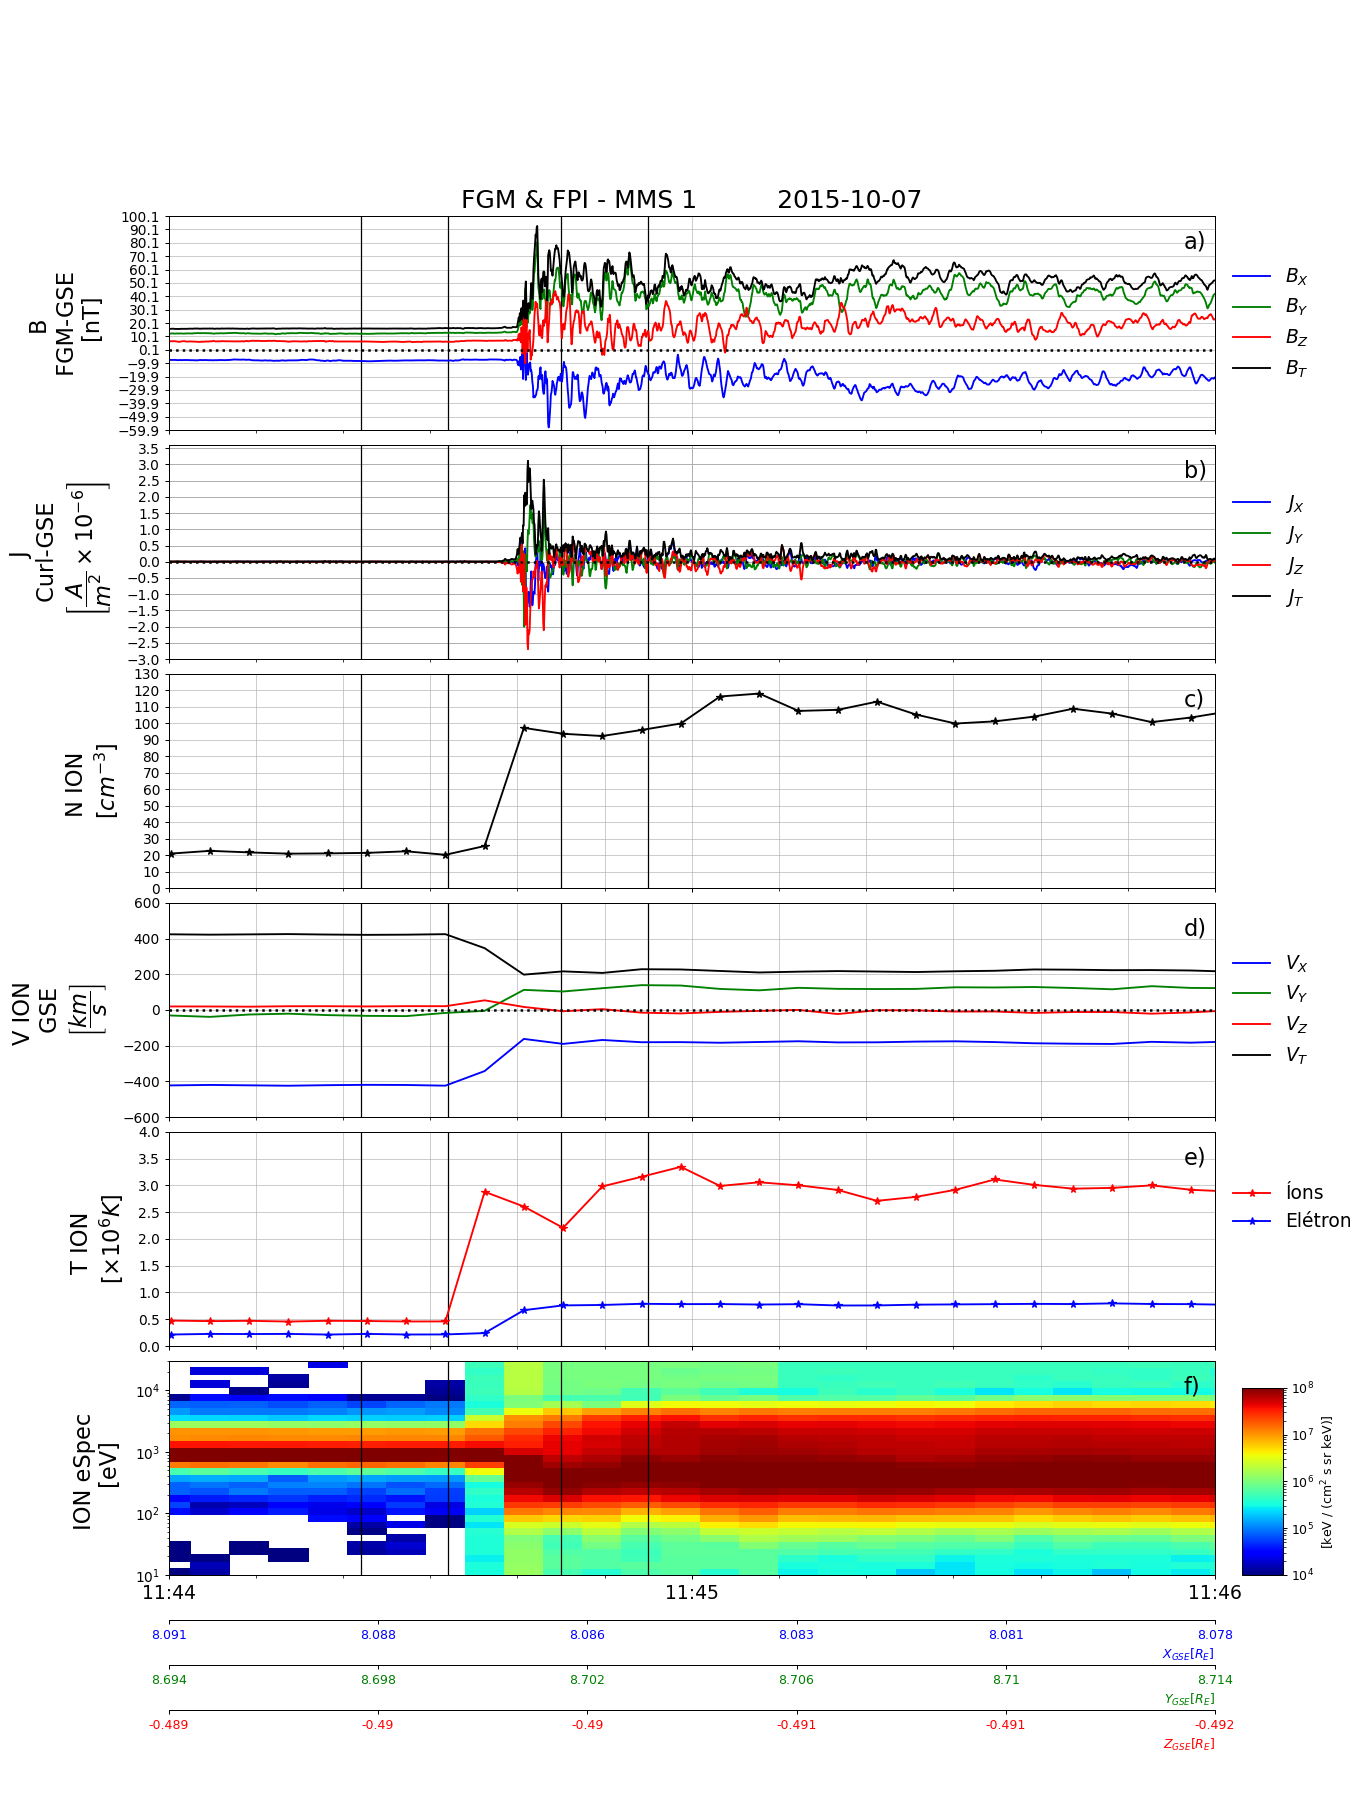

03-Apr-23 10:51:12: C:\Users\mathe\AppData\Local\Temp/ipykernel_50136/1074315864.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs2.set_xticklabels(pos1_r[:,0], color='blue')

03-Apr-23 10:51:12: C:\Users\mathe\AppData\Local\Temp/ipykernel_50136/1074315864.py:129: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs3.set_xticklabels(pos1_r[:,1], color='green')

03-Apr-23 10:51:12: C:\Users\mathe\AppData\Local\Temp/ipykernel_50136/1074315864.py:136: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs4.set_xticklabels(pos1_r[:,2], color='red')



In [155]:
#Plot 
nxs = 6
plt.rcParams['axes.autolimit_mode'] = 'round_numbers' #Arredondar os ticks das extremidades

fig, axs = plt.subplots(nxs, gridspec_kw={'hspace': 0.07},figsize=(15,20))
axs[0].set_title('FGM & FPI - MMS 1'+10*' '+ttext[0],size = 20)

seconds = md.SecondLocator(interval=10)   
minutes = md.MinuteLocator(interval=1)  
formatter = md.DateFormatter('%H:%M')  #'%H.%M'

for n in range(0,nxs):   
    # Barras verticais
    axs[n].axvline(tb_i1 , color='black',lw=1)
    axs[n].axvline(tb_s1 , color='black',lw=1)
    
    axs[n].axvline(tb_i2 , color='black',lw=1)
    axs[n].axvline(tb_s2 , color='black',lw=1)
    
    # Eixo x
    axs[n].xaxis.set_major_locator(minutes)
    axs[n].xaxis.set_major_formatter(formatter)
    axs[n].xaxis.set_minor_locator(seconds)
    axs[n].set_xlim(tb_inf,tb_sup)
    
    #Aumento do tamanho do label dos gráficos
    axs[n].tick_params(axis='x',labelsize=15)
    axs[n].tick_params(axis='y',labelsize=11)
    
    axs[n].label_outer()
    
# Plots do campo magnético 
axs[0].plot(t1, b1[:,0], color='blue' ,label= r'$B_X$')
axs[0].plot(t1, b1[:,1], color='green',label= r'$B_Y$')
axs[0].plot(t1, b1[:,2], color='red'  ,label= r'$B_Z$')
axs[0].plot(t1, b1[:,3], color='black',label= r'$B_T$')

axs[0].grid(linewidth=0.5)
axs[0].set_yticks(np.arange(-59.9, 101, 10))
axs[0].set_ylim([-59.9,100.1])

axs[0].axhline(0, color='black',lw = 2,linestyle=":")
axs[0].legend(loc=(1.01,.2) ,title= '',frameon = False, prop={'size':15})
axs[0].set_ylabel('B \n FGM-GSE \n [nT]', labelpad=10,size = 18)
axs[0].annotate('a)', xy=(0.97,0.85), xycoords='axes fraction',size=18)


#Plots do j_total

axs[1].plot(t1_j, j[:,0]/1e-6, color='blue' ,label= r'$J_X$')
axs[1].plot(t1_j, j[:,1]/1e-6, color='green',label= r'$J_Y$')
axs[1].plot(t1_j, j[:,2]/1e-6, color='red'  ,label= r'$J_Z$')
axs[1].plot(t1_j, j_t[:]/1e-6, color='black',label= r'$J_T$')

axs[1].axhline(0, color='black',lw = 2,linestyle=":")
axs[1].legend(loc=(1.01,.2) ,title= '',frameon = False, prop={'size':15})
axs[1].set_ylabel('J \n Curl-GSE \n '+r'$\left[\dfrac{A}{m^2} \times 10^{-6}\right]$',labelpad=10, size = 18)
axs[1].annotate('b)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

axs[1].grid()
axs[1].set_yticks(np.arange(-3., 3.6, 0.5))
axs[1].set_ylim([-3,3.6])

#axs[2].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.e'))
#Plot de densidade
axs[2].plot(t1_d, d1,'-*', color='black')
axs[2].set_ylabel('N ION \n'+ r'$\left[ cm^{-3} \right]$',labelpad=10, size = 18)
axs[2].annotate('c)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

axs[2].set_ylim([0,130])
axs[2].set_yticks(np.arange(0,131,10))
#axs[2].get_yaxis().set_minor_formatter(plt.LogFormatter(10,  labelOnlyBase=False))

axs[2].grid(which='both',linewidth=0.5)
#axs[2].set_yscale('log')

# Plot da velocidade

axs[3].plot(t1_v, v1[:,0], color='blue' , label= r'$V_X$')
axs[3].plot(t1_v, v1[:,1], color='green', label= r'$V_Y$')
#
axs[3].plot(t1_v, v1[:,2], color='red'  , label= r'$V_Z$')
axs[3].plot(t1_v, v1_t[:], color='black', label= r'$V_T$')

axs[3].legend(loc=(1.01,.2),title= '', frameon = False, prop={'size':15})
axs[3].set_ylabel('V ION \n GSE \n'+ r'$ \left[ \dfrac{km}{s} \right]$',labelpad=10, size = 18)
axs[3].annotate('d)', xy=(0.97,0.85), xycoords='axes fraction',size=18)
axs[3].grid(which='both',linewidth=0.5)
axs[3].axhline(0, color='black',lw = 2,linestyle=":")

#axs[5].plot(t1_d, dis_T*11600,'-*',color='red', label='Íons')
#axs[5].plot(t1_d, des_T*11600,'-*',color='blue',label='Elétrons'), semilogy

axs[4].plot(t1_d, dis_T*11600/1e6,'-*',color='red', label='Íons')
axs[4].plot(t1_d, des_T*11600/1e6,'-*',color='blue',label='Elétrons')
axs[4].set_ylabel('T ION \n'+ r'$\left[ \times 10^6  K \right]$',labelpad=10, size = 18)
axs[4].annotate('e)', xy=(0.97,0.85), xycoords='axes fraction',size=18)
axs[4].legend(loc=(1.01,.5) ,title= '',frameon = False, prop={'size':15})
axs[4].grid(which='both',linewidth=0.5)

axs[4].set_ylim([0,4])
axs[4].set_yticks(np.arange(0,4.1,0.5))

c = axs[5].pcolor(t1_en,np.transpose(energy1_i),np.transpose(data1_i), shading='auto', norm=LogNorm(vmin=1e4, vmax=1e8), cmap='jet')
axs[5].set_yscale('log') 
axs[5].set_ylabel('ION eSpec \n [eV]',labelpad=10, size = 18)
axs[5].annotate('f)', xy=(0.97,0.85), xycoords='axes fraction',size=18)

#axs[5].set_ylim([10e0,1.1*10e3])
axs[5].set_ylim([10e0,3*1e4])

cbaxes = fig.add_axes([0.92, 0.125, 0.03, 0.104]) 
fig.colorbar(c, ax = axs[3], cax = cbaxes, label = '[keV / '+ r'(cm$^2$ s sr keV)]') 

#################################

axs2 = axs[5].twiny()
axs2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
axs2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs2.spines['bottom'].set_position(('outward', 36))
axs2.set_xticklabels(pos1_r[:,0], color='blue')
axs2.set_xlabel(r'$X_{GSE}[R_E]$', loc='right', color='blue')

axs3 = axs2.twiny()
axs3.xaxis.set_ticks_position('bottom')
axs3.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs3.spines['bottom'].set_position(('outward', 72))

axs3.set_xticklabels(pos1_r[:,1], color='green')
axs3.set_xlabel(r'$Y_{GSE}[R_E]$', loc='right', color= 'green')

axs4 = axs3.twiny()
axs4.xaxis.set_ticks_position('bottom')
axs4.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
axs4.spines['bottom'].set_position(('outward', 108))
axs4.set_xticklabels(pos1_r[:,2], color='red')
axs4.set_xlabel(r'$Z_{GSE}[R_E]$', loc='right',color='red')

#for ii in range(1,5):
#    axs[ii].grid(axis='y')   
    
#Salvamento em formato png

plt.savefig('MMS1_comE.png', dpi=300, bbox_inches = 'tight')
plt.show()

* ## Região pré-shock (1)

* ### Achar os índices

In [156]:
def IVal(v,init,fim):
    
    tam = len(v)
    t   = np.zeros((tam, 2))
    i   = np.zeros((1, 2))
    
    for ii in range(tam):
        
        t[ii, 0] = np.abs(init - v[ii])
        t[ii, 1] = np.abs(fim - v[ii])   
    
    i[0,0] = t[:,0].argmin()
    i[0,1] = t[:,1].argmin()
    
    return i

In [157]:
tim = [t1, t1_d, t1_v, t1_j, t_p1]

ips1 = np.zeros((len(tim),2))

for j in range(len(tim)):
    
    ips1[j] = IVal(tim[j], tb_i1, tb_s1)

* ### Médias 

In [158]:
b1_m  = [ np.mean(b1[round(ips1[0][0]): round(ips1[0][1])+1,0]),
          np.mean(b1[round(ips1[0][0]): round(ips1[0][1])+1,1]),
          np.mean(b1[round(ips1[0][0]): round(ips1[0][1])+1,2])
                                         ]
B1_m  = np.mean(b1[ round(ips1[0][0]): round(ips1[0][1])+1,3])

v1_m  = [np.mean(v1[round(ips1[2][0]): round(ips1[2][1])+1,0]),
          np.mean(v1[round(ips1[2][0]): round(ips1[2][1])+1,1]),
          np.mean(v1[round(ips1[2][0]): round(ips1[2][1])+1,2])
                                         ]
v1_tm  = np.mean(v1_t[round(ips1[2][0]):round(ips1[2][1])+1])

d1_m  = np.mean(d1[round(ips1[1][0]):round(ips1[1][1])+1])
T1_mi = np.mean(dis_T[round(ips1[1][0]):round(ips1[1][1])+1])*11600
T1_me = np.mean(des_T[round(ips1[1][0]):round(ips1[1][1])+1])*11600

pos1_mr  = pos1_r[round(ips1[-1][0]),:]

* ## Região pós-shock (2)

* ### Achar os índices

In [159]:
tim = [t1, t1_d, t1_v, t1_j, t_p1]

ips2 = np.zeros((len(tim),2))

for j in range(len(tim)):
    
    ips2[j] = IVal(tim[j], tb_i2, tb_s2)

* ### Médias 

In [160]:
b2_m  = [np.mean( b1[round(ips2[0][0]): round(ips2[0][1])+1,0]),
          np.mean(b1[round(ips2[0][0]): round(ips2[0][1])+1,1]),
          np.mean(b1[round(ips2[0][0]): round(ips2[0][1])+1,2])
                                         ]
B2_m  = np.mean(b1[ round(ips2[0][0]): round(ips2[0][1])+1,3])

v2_m  = [np.mean( v1[round(ips2[2][0]): round(ips2[2][1])+1,0]),
          np.mean(v1[round(ips2[2][0]): round(ips2[2][1])+1,1]),
          np.mean(v1[round(ips2[2][0]): round(ips2[2][1])+1,2])
                                         ]
v2_tm  = np.mean(v1_t[round(ips2[2][0]):round(ips2[2][1])+1])

d2_m  = np.mean(d1[round(ips2[1][0]):round(ips2[1][1])+1])
T2_mi = np.mean(dis_T[round(ips2[1][0]):round(ips2[1][1])+1])*11600
T2_me = np.mean(des_T[round(ips2[1][0]):round(ips2[1][1])+1])*11600

pos2_mr  = pos1_r[round(ips2[-1][0]),:]

### Resumo 

In [161]:
print('---------------------------------Valores no vento solar [1]-----------------------------------------')
print('------------------------------------------------------------------------------------------------')
print('Bx[nT]\t By[nT]\t Bz[nT]\t Bt[nT]\t d[cm^-3]   T[k]    Vx[km/s]  Vy[km/s]  Vz[km/s]  VT[km/s]')
print('------------------------------------------------------------------------------------------------')
print('%2.2f  \t%  2.2f \t%2.2f \t %2.2f \t   %2.2f   %2.2e   %2.2f    %2.2f   %2.2f    %2.2f'%(b1_m[0],b1_m[1],b1_m[2],B1_m,d1_m,T1_mi,v1_m[0],v1_m[1],v1_m[2],v1_tm))

---------------------------------Valores no vento solar [1]-----------------------------------------
------------------------------------------------------------------------------------------------
Bx[nT]	 By[nT]	 Bz[nT]	 Bt[nT]	 d[cm^-3]   T[k]    Vx[km/s]  Vy[km/s]  Vz[km/s]  VT[km/s]
------------------------------------------------------------------------------------------------
-8.03  	 12.40 	6.12 	 16.00 	   21.27   4.62e+05   -421.46    -27.80   20.91    422.97


In [162]:
print('-------------------------------Valores na bainha magnética [2]--------------------------------------')
print('------------------------------------------------------------------------------------------------')
print('Bx[nT]\t By[nT]\t Bz[nT]\t Bt[nT]\t d[cm^-3]   T[k]    Vx[km/s]  Vy[km/s]  Vz[km/s]  VT[km/s]')
print('------------------------------------------------------------------------------------------------')
print('%2.2f   %2.2f \t %2.2f\t %2.2f\t   %2.2f   %2.2e  %2.2f   %2.2f    %2.2f     %2.2f'%(b2_m[0],b2_m[1],b2_m[2],B2_m,d2_m,T2_mi,v2_m[0],v2_m[1],v2_m[2],v2_tm))

-------------------------------Valores na bainha magnética [2]--------------------------------------
------------------------------------------------------------------------------------------------
Bx[nT]	 By[nT]	 Bz[nT]	 Bt[nT]	 d[cm^-3]   T[k]    Vx[km/s]  Vy[km/s]  Vz[km/s]  VT[km/s]
------------------------------------------------------------------------------------------------
-25.32   42.58 	 14.87	 53.16	   94.00   2.78e+06  -179.60   121.75    -5.67     217.70


* ### [B]

In [163]:
DB = np.array(b2_m)-np.array(b1_m)
DB

array([-17.282837,  30.172283,   8.745724], dtype=float32)

* ### [V]

In [164]:
DV = np.array(v2_m)-np.array(v1_m)
DV

array([241.86008 , 149.55205 , -26.575811], dtype=float32)

* ## Cálculo do n (usando DB,DV e DB)
    ### Mixed data 3

In [165]:
n   = np.cross(np.cross(DB,DV),DB)
n_m = n/np.linalg.norm(n)

n_m

array([ 0.8515854 ,  0.51545537, -0.09543554], dtype=float32)

In [166]:
cos_m = np.dot(n_m, b1_m)/(B1_m)
o_nm  = np.arccos(cos_m)*(180/np.pi)

round(180 - o_nm,3)

86.304

In [167]:
cos_m = np.dot(n_m, b1_m)/( np.sqrt(b1_m[0]**2+b1_m[1]**2+b1_m[2]**2) )
o_nm  = np.arccos(cos_m)*(180/np.pi)

round(180 - o_nm,3)

86.303